# Scenerio Testing BHC Module

### Test Scenerios:

1) Simulated data clusters: Three component Gaussian mixture

2) Real data set presented in BHC paper: Glass data set

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg as la
from scipy import random as rnd
from scipy.special import gamma
import matplotlib.pyplot as plt

import bhc

### Data Sets

**Three component Gaussian mixture:**

In [2]:
# bivariate gaussian params
mu1 = np.zeros(2)
cov1 = np.eye(2)

mu2 = np.array([5, 3])
cov2 = np.eye(2) * 2

mu3 = np.array([8, 12])
cov3 = np.array([3.4, 0, 0, 5.1]).reshape(2, 2)

# multinom params
p1 = 0.4 #0.3
p2 = 0 #0.4
p3 = 1 - p2 - p1

# number of total draws
draws = 100

In [3]:
# random draws
rnd.seed(1)

knum = rnd.multinomial(draws, (p1, p2, p3))

gaus1 = rnd.multivariate_normal(mu1, cov1, knum[0])
gaus2 = rnd.multivariate_normal(mu2, cov2, knum[1])
gaus3 = rnd.multivariate_normal(mu3, cov3, knum[2])

# join columns into dataframe
x1 = pd.Series(np.r_[gaus1[:, 0], gaus2[:, 0], gaus3[:, 0]])
x2 = pd.Series(np.r_[gaus1[:, 1], gaus2[:, 1], gaus3[:, 1]])
c = pd.Series(np.r_[np.zeros(knum[0]), np.ones(knum[1]), np.ones(knum[2]) * 2])
dat = {"x1" : x1, "x2" : x2, "c" : c}
clustData = pd.DataFrame(dat)

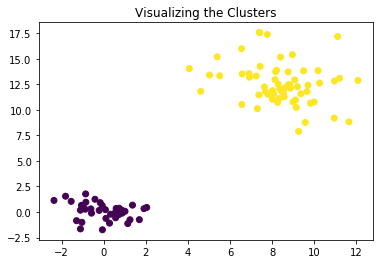

In [4]:
plt.scatter(clustData["x1"], clustData["x2"], c = clustData["c"])
plt.title("Visualizing the Clusters")
plt.show()

In [5]:
# priors distribution hyper-parameters
gcPriors = {
    "clusterConcentrationPrior" : {"alpha" : 0.01},
    "diffuseInvWishPrior" : {"df" : 10, "scale" : np.eye(2)}, # inv wishart params
    "diffuseNormPrior" : {"loc" : np.array([1,0]),
                          "scale" : np.eye(2),
                          "meanscale" : 1}, # mvtnormal params
}

In [6]:
gc = clustData.values[:50, :2]
gctree = bhc.HierarchyTree(X = gc, allParams = gcPriors)

In [7]:
gctree.grow_tree()

In [8]:
# pre prunning tree summary
gctree.tree_summary()

Summary for tier 39:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 50.0
	 Posterior merge probability: 2.6e-43


Summary for tier 38:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 39.0
	 Posterior merge probability: 4.7e-22


Summary for tier 37:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 38.0
	 Posterior merge probability: 0.93


Summary for tier 36:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 37.0
	 Posterior merge probability: 0.96


Summary for tier 35:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 36.0
	 Posterior merge probability: 0.96


Summary for tier 34:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 35.0
	 Posterior merge probability: 0.94


Summary for tier 33:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 34.0
	 Posterior merge probability: 0.95


Summary for tier 32:
---------------------

In [9]:
gctree.prune_tree()

In [10]:
# post prunning tree summary
gctree.tree_summary()

Summary for tier 38:
-------------------------------
Number of clusters: 2
  Cluster 0 size: 1.0
	 Posterior merge probability: 1.0
  Cluster 1 size: 38.0
	 Posterior merge probability: 0.93


Summary for tier 37:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 38.0
	 Posterior merge probability: 0.93


Summary for tier 36:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 37.0
	 Posterior merge probability: 0.96


Summary for tier 35:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 36.0
	 Posterior merge probability: 0.96


Summary for tier 34:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 35.0
	 Posterior merge probability: 0.94


Summary for tier 33:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 34.0
	 Posterior merge probability: 0.95


Summary for tier 32:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 33.0
	 Posterior merge probability

In [29]:
for k, v in gctree.tree[37].items():
    print(k, v)
    print("\nThis is the cluster in the Split at node 37")
    print(v.clust)

(1, (33, (21, (0, (8, (3, (15, (27, (28, (13, (24, (19, (35, (9, (10, (25, (29, (17, (14, (2, (36, (12, (4, (23, (5, (31, (37, (32, (6, (18, (16, (22, (20, (26, (11, (7, (30, 34))))))))))))))))))))))))))))))))))))) <bhc.split.Split object at 0x1a1dc6fa58>

This is the cluster in the Split at node 37
[[-2.3634686   1.13534535]
 [-1.81342356  1.54744858]
 [ 2.04202875  0.44752069]
 [-1.10593508 -1.65451545]
 [ 1.91382039  0.33079713]
 [-0.85990661  1.77260763]
 [-0.06249159 -1.73865429]
 [ 1.3670327   0.67371607]
 [-1.2915627  -0.84824392]
 [-1.03803876 -1.00947983]
 [-0.41611158  1.25005005]
 [ 1.69182613 -0.74795374]
 [-1.54672407  1.04520063]
 [ 1.14194252 -1.12959516]
 [-0.85005238  0.96082   ]
 [ 1.24829979 -0.75767414]
 [-0.16659957  0.91719602]
 [ 0.27571804 -1.09067489]
 [-1.05825656  0.65628408]
 [-1.01701414  0.63736181]
 [ 1.01037548  0.07083664]
 [ 0.87341823 -0.11138337]
 [-1.11036305  0.18121427]
 [ 0.85723427  0.18393058]
 [ 0.56434487 -0.56651023]
 [-0.8804768   0.2781288

In [22]:
gctree.tree[37]

TypeError: 'dict_values' object does not support indexing

**Glass Data Set:**

In [2]:
glassurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
glasshead = ["ID", "RI", "Na", "Mg", "Al", "Si",
             "K", "Ca", "Ba", "Fe", "Type"]
glass = pd.read_csv(glassurl, names = glasshead, index_col = 0)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


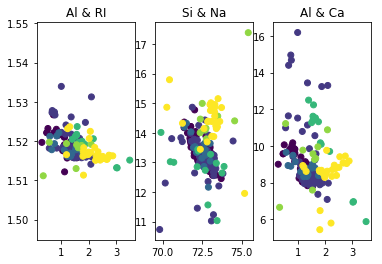

In [3]:
fig, ax = plt.subplots(ncols = 3)
ax[0].scatter(glass["Al"], glass["RI"], c = glass["Type"])
ax[0].set_title("Al & RI")
ax[1].scatter(glass["Si"], glass["Na"], c = glass["Type"])
ax[1].set_title("Si & Na")
ax[2].scatter(glass["Al"], glass["Ca"], c = glass["Type"])
ax[2].set_title("Al & Ca")
plt.show()

**Data Set 3**